In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns

In [2]:
df=pd.read_csv('buy1.csv')

In [3]:
df.describe()

,Seating_Capacity
count,1270.000000
mean,5.270079
std,1.145231
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,16.000000


In [4]:
df.head()

,Seating_Capacity,Width,Length,Body_Type,Ex-Showroom_Price,Model
0,4.0,1750 mm,3164 mm,Hatchback,"Rs. 2,92,667",Nano Genx
1,4.0,1750 mm,3164 mm,Hatchback,"Rs. 2,36,447",Nano Genx
2,4.0,1750 mm,3164 mm,Hatchback,"Rs. 2,96,661",Nano Genx
3,4.0,1750 mm,3164 mm,Hatchback,"Rs. 3,34,768",Nano Genx
4,4.0,1750 mm,3164 mm,Hatchback,"Rs. 2,72,223",Nano Genx


In [5]:
df.isnull().sum()

Seating_Capacity      6
Width                12
Length                0
Body_Type             6
Ex-Showroom_Price     0
Model                 0
dtype: int64

In [6]:
df['Body_Type'].value_counts()

SUV                    447
Sedan                  333
Hatchback              316
Coupe                   41
MUV                     39
MPV                     39
Convertible             20
Crossover               18
Sports                   3
Pick-up                  3
Crossover, SUV           2
Sports, Convertible      2
SUV, Crossover           2
Sedan, Coupe             2
Sports, Hatchback        1
Coupe, Convertible       1
Sedan, Crossover         1
Name: Body_Type, dtype: int64

In [7]:
df["Body_Type"]=np.where(df["Body_Type"]==('SUV'),17,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Sedan'),16,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Hatchback'),15,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('MUV'),14,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('MPV'),13,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Convertible'),12,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Coupe'),11,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Crossover'),10,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Pick-up'),9,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Sports'),8,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Crossover, SUV'),7,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('SUV, Crossover'),6,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Sedan, Coupe'),5,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Sports, Convertible'),4,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Sedan, Crossover'),3,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Coupe, Convertible'),2,df["Body_Type"])
df["Body_Type"]=np.where(df["Body_Type"]==('Sports, Hatchback'),1,df["Body_Type"])
df['Body_Type']=df['Body_Type'].fillna(17)

In [8]:
df['Seating_Capacity'].value_counts()

5.0     915
7.0     183
4.0      70
2.0      39
6.0      26
9.0      19
8.0      17
16.0      1
Name: Seating_Capacity, dtype: int64

In [9]:
df['Seating_Capacity']=df['Seating_Capacity'].fillna(5.0)

In [10]:
df['Width'].value_counts()

1695 mm    76
1735 mm    70
1730 mm    36
1811 mm    30
1745 mm    29
           ..
1953 mm     1
1885 mm     1
2052 mm     1
1920 mm     1
1945 mm     1
Name: Width, Length: 182, dtype: int64

In [11]:
df['Width']=df['Width'].fillna('1695 mm')

In [12]:
df.isnull().sum()

Seating_Capacity     0
Width                0
Length               0
Body_Type            0
Ex-Showroom_Price    0
Model                0
dtype: int64

In [13]:
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)

In [14]:
corr=df.corr()
corr

,Seating_Capacity,Width,Length,Body_Type,price
Seating_Capacity,1.000000,0.014850,0.125886,0.352538,-0.307150
Width,0.014850,1.000000,0.793065,0.049171,0.420511
Length,0.125886,0.793065,1.000000,0.073005,0.401162
Body_Type,0.352538,0.049171,0.073005,1.000000,-0.280395
price,-0.307150,0.420511,0.401162,-0.280395,1.000000


<AxesSubplot:>

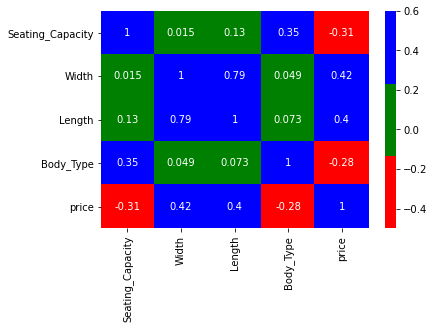

In [15]:
sns.heatmap(corr, cmap=['red','green','blue'], vmin=-0.5, vmax=0.6, annot=True)

In [16]:
df.head()

,Seating_Capacity,Width,Length,Body_Type,Model,price
0,4.0,1750.0,3164.0,15,Nano Genx,4097.338
1,4.0,1750.0,3164.0,15,Nano Genx,3310.258
2,4.0,1750.0,3164.0,15,Nano Genx,4153.254
3,4.0,1750.0,3164.0,15,Nano Genx,4686.752
4,4.0,1750.0,3164.0,15,Nano Genx,3811.122


In [17]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression

In [18]:
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(893, 6)
(383, 6)


In [19]:
train_X = train[['price','Body_Type','Seating_Capacity','Length', 'Width']]
train_y=train.Model
test_X= test[['price','Body_Type','Seating_Capacity','Length', 'Width']]
test_y =test.Model

In [20]:
model = svm.SVC() 
model.fit(train_X,train_y) 
prediction=model.predict(test_X)

In [21]:
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.0391644908616188


In [22]:
import pickle
pickle.dump(model, open('buy01.pkl','wb'))